In [1]:
import seaborn as sns
import pandas as pd

In [2]:
df = sns.load_dataset('tips')

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Encoding categorical features

In [4]:
from sklearn.preprocessing import OneHotEncoder

In [5]:
encoder = OneHotEncoder(sparse=False,handle_unknown='ignore')

In [6]:
cols_to_encode = ['sex','smoker','day']
encoded_data = encoder.fit_transform(df[cols_to_encode])

In [7]:
print(encoded_data)

[[1. 0. 1. ... 0. 1. 0.]
 [0. 1. 1. ... 0. 1. 0.]
 [0. 1. 1. ... 0. 1. 0.]
 ...
 [0. 1. 0. ... 1. 0. 0.]
 [0. 1. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 0. 0. 1.]]


In [8]:
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(input_features=cols_to_encode))

In [9]:
encoded_df.head()

,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [10]:
df.drop(columns=cols_to_encode,inplace=True)

In [11]:
df = pd.concat([df,encoded_df],axis=1)

The `axis` parameter in the `pd.concat` function specifies the axis along which the concatenation will take place. It determines whether you are concatenating the DataFrames vertically (along rows) or horizontally (along columns). 

- `axis=0` (the default): Vertical concatenation. It stacks DataFrames on top of each other, adding rows.
- `axis=1`: Horizontal concatenation. It joins DataFrames side by side, adding columns.

In your specific code:

```python
merged_df = pd.concat([original_df, encoded_df], axis=1)
```

You are performing a horizontal concatenation (`axis=1`). This means that `original_df` and `encoded_df` are joined together side by side, combining their columns. The resulting `merged_df` will have all the columns from `original_df` followed by all the columns from `encoded_df`.

In [12]:
df.head()

,total_bill,tip,time,size,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur
0,16.99,1.01,Dinner,2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,10.34,1.66,Dinner,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,21.01,3.50,Dinner,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,23.68,3.31,Dinner,2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4,24.59,3.61,Dinner,4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


### Transforming target (Time) column into numerical values

In [13]:
mapping = {'Lunch': 0, 'Dinner': 1}
df['time_encoded'] = df['time'].map(mapping)

In [16]:
df.drop(columns=['time'],inplace=True)

In [17]:
df.head()

,total_bill,tip,size,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_encoded
0,16.99,1.01,2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
1,10.34,1.66,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1
2,21.01,3.50,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1
3,23.68,3.31,2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1
4,24.59,3.61,4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1


### Seperating dependent and independent variables

In [28]:
X = df.iloc[:,:-1]
X

,total_bill,tip,size,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur
0,16.99,1.01,2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,10.34,1.66,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,21.01,3.50,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,23.68,3.31,2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4,24.59,3.61,4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
240,27.18,2.00,2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
241,22.67,2.00,2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
242,17.82,1.75,2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [31]:
y = df['time_encoded']
y

0      1
1      1
2      1
3      1
4      1
      ..
239    1
240    1
241    1
242    1
243    1
Name: time_encoded, Length: 244, dtype: category
Categories (2, int64): [0, 1]

In [32]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [33]:
from sklearn.naive_bayes import GaussianNB

In [34]:
model = GaussianNB()

In [35]:
model.fit(X_train,y_train)

GaussianNB()

In [36]:
y_pred = model.predict(X_test)

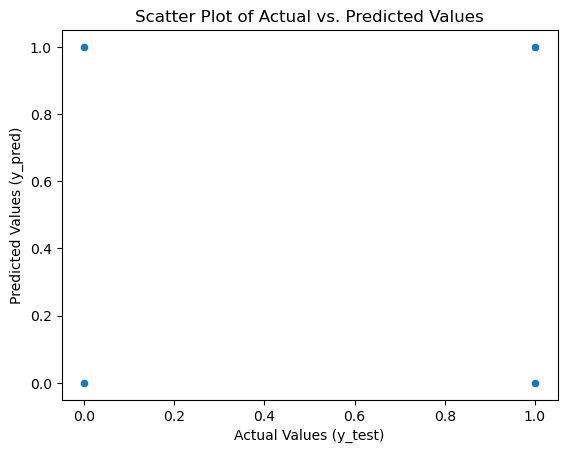

In [40]:
import matplotlib.pyplot as plt
sns.scatterplot(x=y_test, y=y_pred)

plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Scatter Plot of Actual vs. Predicted Values")


plt.show()

In [37]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [38]:
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.918918918918919
              precision    recall  f1-score   support

           0       0.93      0.72      0.81        18
           1       0.92      0.98      0.95        56

    accuracy                           0.92        74
   macro avg       0.92      0.85      0.88        74
weighted avg       0.92      0.92      0.92        74

[[13  5]
 [ 1 55]]
